# Importando os pacotes

In [1]:
from keras import models
from keras import layers
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

# Lendo os dados

In [3]:
data = np.array(pd.read_csv('Pima-Diabetes.csv'))

# Tratando os dados

Aqui, normalizo os dados e os separo entre os dados de treino e de teste.

In [4]:
data = data/data.max(axis=0)

train_info = data[:int(0.8*len(data)),:-1]

train_ans = data[:int(0.8*len(data)),-1]

test_info = data[int(0.8*len(data)):,:-1]

test_ans = data[int(0.8*len(data)):,-1]


# Criando e compilando a rede neural

In [5]:
network = models.Sequential()
network.add(layers.Dense(500, activation = 'sigmoid', input_shape = (8,)))
network.add(layers.Dropout(0.4))
network.add(layers.Dense(100, activation = 'sigmoid'))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(1, activation = 'sigmoid'))

network.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

# Treinando a rede

In [6]:
network.fit(train_info, train_ans, epochs = 250, batch_size = 300)

Epoch 1/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.6132
Epoch 2/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.6463
Epoch 3/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.6215
Epoch 4/250
3/3 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.6479
Epoch 5/250
3/3 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6529
Epoch 6/250
3/3 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6397
Epoch 7/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5901
Epoch 8/250
3/3 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5769
Epoch 9/250
3/3 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.6099
Epoch 10/250
3/3 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6463
Epoch 11/250
3/3 [===========

# Testando o resultado do treinamento com os dados de teste

In [7]:
test_loss, test_acc = network.evaluate(test_info, test_ans)
print('test_acc =', test_acc)

5/5 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6382
test_acc = 0.6381579041481018


# Curva roc

Vamos utilizar os dados de teste, já que o outro arquivo fornecido não possuía gabarito.

In [8]:
k = network.predict(test_info)

real_positive = k[np.where(test_ans == 1)]
real_negative = k[np.where(test_ans == 0)]

# Vou criar as listas vazias para os casos possíveis 

Tp = True positive 

Fp = False positive

Tn = True negative

Fn = False negative

Tpr = True positive rate

Fpr = False positive rate

In [9]:
Tp = []
Fp = []
Fn = []
Tn = []

Tpr = []
Fpr = []

# Calculando as taxas 

In [11]:
threshold = np.linspace(0,1,100)

for i in range(len(threshold)):
    Tp.append(len(real_positive[np.where(real_positive>threshold[i])]))
    Fp.append(len(real_negative[np.where(real_negative>threshold[i])]))
    Fn.append(len(real_positive[np.where(real_positive<threshold[i])]))
    Tn.append(len(real_negative[np.where(real_negative<threshold[i])]))
    
    Tpr.append(Tp[i]/(Tp[i] + Fn[i]))
    Fpr.append(Fp[i]/(Fp[i] + Tn[i]))

# Plot da curva roc

Text(0.5, 1.0, 'Roc Curve')

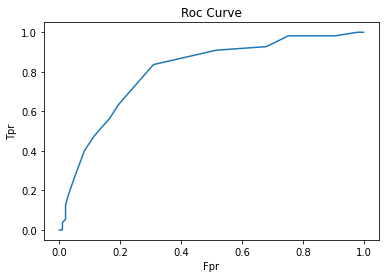

In [12]:
plt.plot(Fpr, Tpr)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('Roc Curve')

# Taxa ótima

Queremos encontrar qual o melhor valor para o threshold, isto é, o valor que nos dá o maior número de previsões corretas.

In [13]:
best_threshold = threshold[np.argmax(np.array(Tp) + np.array(Tn) - np.array(Fp) - np.array(Fn))]

print('best_threshold =', best_threshold)

best_threshold = 0.37373737373737376
